In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/ProteinConc/'
prots = pd.read_csv(workdir + '20230427_prot_conc_90W.csv')

for i in range(len(prots.columns)):
    print(str(i) + ' ' + prots.columns[i])

0 Wavelength [nm]
1 TBS
2 90W_2
3 90W_4
4 90W_6
5 90W_8
6 90W_10
7 90W_12


In [3]:
def auto_zero(protdb):
    for name in protdb.columns[1:]:
        #print(protdb.columns)
        x = protdb[name][310:410]  - protdb[protdb.columns[0]][310:410]
        y = sum(x)/len(x)
        protdb[name] = protdb[name] - y
    return protdb


def get_conc(prot, bfactor):
    xs = [0, 2/400, 4/402, 6/404, 8/406, 10/408, 12/410]
    xs_re = np.array(xs).reshape(-1, 1)


    ys_280 = prot.iloc[280-190, :]
    reg_280 = LinearRegression().fit(xs_re, ys_280)
    print('R: {}'.format(reg_280.score(xs_re, ys_280)))
    print('intercept_: {}'.format(reg_280.intercept_))

    ys_280_corr = ys_280 - reg_280.intercept_
    prot_conc = ys_280_corr/bfactor*1000*1000

    factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12]
    prot_conc_stock = []

    for i in range(6):
        prot_conc_stock.append(prot_conc[i+1]*factors[i])

    print(prot_conc_stock)
    print(np.mean(prot_conc_stock[1:]))


    fig,ax = plt.subplots()
    ax.scatter(xs_re, ys_280)
    ax.plot(xs_re, ys_280)
    plt.xlim([0, 0.04])
    plt.ylim([-0.05, 1.5])
    return prot_conc_stock, np.mean(prot_conc_stock[1:])

In [4]:

prot_90W = prots[prots.columns[1:8]]
print(prot_90W.columns)


#print(prot599_HBST.iloc[280-190, 1])
prot_90W = auto_zero(prot_90W)
#print(prot599_HBST.iloc[280-190, 1])


Index(['TBS', '90W_2', '90W_4', '90W_6', '90W_8', '90W_10', '90W_12'], dtype='object')


/tmp/ipykernel_9839/135504908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protdb[name] = protdb[name] - y


R: 0.9997893766538398
intercept_: 0.001310453899798114
[1989.8051544737332, 2079.202461640937, 2092.651231354305, 2070.391162815325, 2046.4711179672752, 2053.429307981855]
2068.42905635194


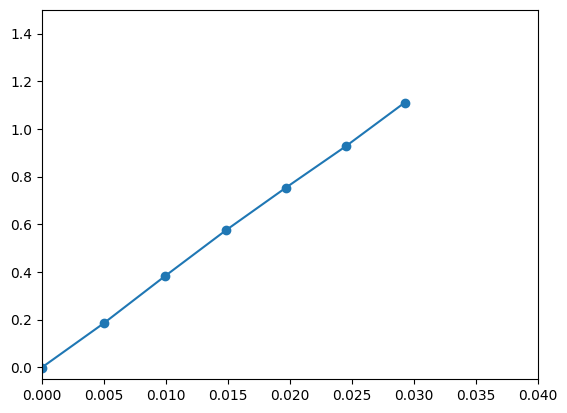

In [5]:

prot599_HBST_concs, prot599_HBST_conc = get_conc(prot_90W, bfactor=18450)
